# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


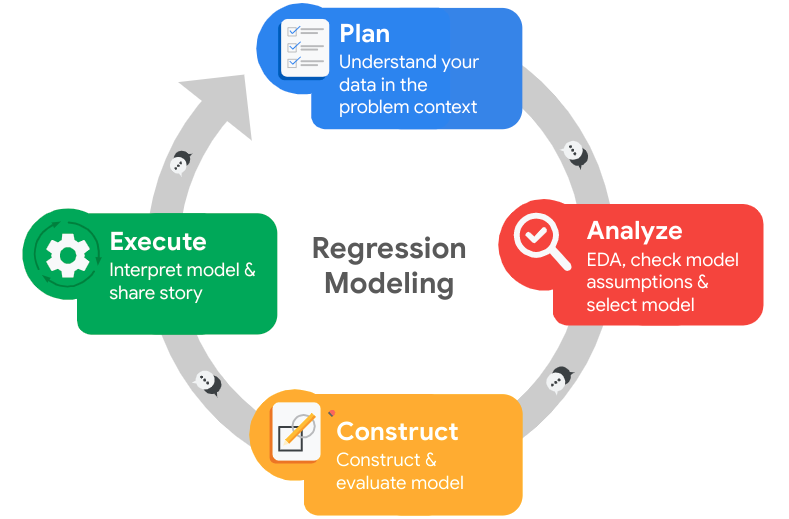

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: ***what’s likely to make the employee leave the company?***

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Question 1**:

- The HR department at Salifort Motors: primary stakeholder and project sponsor
- Department Managers: They will be directly affected by employee departures and will likely be responsible for implementing any retention strategies HR develops.
- Senior Leadership (C-suite): They care about the high-level business impact, such as the overall cost of employee turnover (attrition) and the company's reputation.

</br>

**Question 2**:

- Build a model to predict whether or not an employee will leave.
- Find out the possible factors that contribute to their leaving.

</br>

**Question 3**:

- There are 14,999 rows and 10 columns in the dataset before cleaning. After dropping some duplicated rows, we have 11991 rows remaining.
- In the raw data, the 'left' rate was 23.8%. After dropping some duplicated rows, the true 'left' rate in the dataset is 16.7%, which means that about 16.7% of all employees that have been working in the company left the company. This also implies that our dataset is imbalanced.
- The maximum average monthly hours is 310, which means that he/she works about 10-11 hours/day x 7 days in average. Does it make sense? We could do some statistical analysis on this.

</br>

**Question 4**:

- Pandas & Seaborn/Matplotlib documentation: For data cleaning, manipulation, and visualization.
- Scikit-learn & XGBoost documentation: For model building, preprocessing (like scaling), and evaluation (like classification_report).
- The previous activities in this course.

</br>

**Question 5**:

Because the dataset is imbalance, we cannot use `accuracy` as a single-number evaluation metric, but it is still useful for interpretation of the model evaluation. In order to know which metrics are appropriate, we need to consider:

- False Positive: This means that the model predicts an employee will leave, but they actually stay. So, we need the data of what incentive will the company provide for the employee who are leaving to know the wasted cost of this prediction.
- False Negative: This means that the model predicts an employee will stay, but they actually leave. So, we need the data of the cost the company need to pay to recruit and train new employees to know the wasted cost of this prediction.

If we have both the information above, we then could consider whether precision or recall is the most appropriate to be our single-number evaluation metric. So, for now I'll consider to use roc-auc instead.

</br>

Consequences of Prediction:

- The "Good" use: The list is given to managers to have supportive, proactive conversations with their team members. They might ask, "How is your workload? Are you happy with your projects? Let's discuss your career path." This helps the employee.
- The "Bad" use: The list is used to discriminate against employees. A manager might see someone is a "flight risk" and decide not to give them a promotion, a raise, or a spot on an important project, thinking, "Why bother? They're just going to leave anyway." This punishes the employee and could even be the very thing that causes them to leave.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'Department': 'department',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isnull().any(axis=1).sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [12]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


We could perform a likelihood analysis using Bayes' Theorem, but this is not necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate.

In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

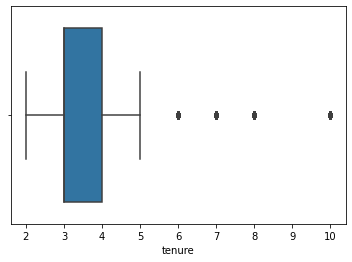

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df1['tenure'])
plt.show();

In [18]:
# Determine the number of rows containing outliers
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [22]:
# Check the imbalanced data
df1['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [23]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

**Question 1**:

*Refer to the explanation below the plot.

</br>

**Question 2**:

The target variable `left` is highly imbalanced. After cleaning, the data consists of 83.3% employees who stayed (0) and only 16.7% who left (1). 

</br>

**Question 3**:

We performed two main transformations:

- Removed Duplicates: The raw data (14,999 rows) contained a significant number of duplicates. We removed them to get our final, clean dataset (11,991 rows).

- Categorical Encoding (Planned for Modeling): We decided on a strategy to convert text features into numbers for the tree-based model.
    - salary $\rightarrow$ Ordinal Encoding: low=0, medium=1, high=2
    - department $\rightarrow$ One-Hot Encoding using `pd.get_dummies`

</br>

**Question 4**:

- Our EDA was the reason we rejected Logistic Regression and chose a tree-based model. We discovered non-linear and complex interactions that a linear model would completely miss.
- We found the 16.7% class imbalance, which helps us to decide the appropriate evaluation metrics.
- We found and removed duplicates, which fundamentally changed our understanding of the dataset's base attrition rate.

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [24]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


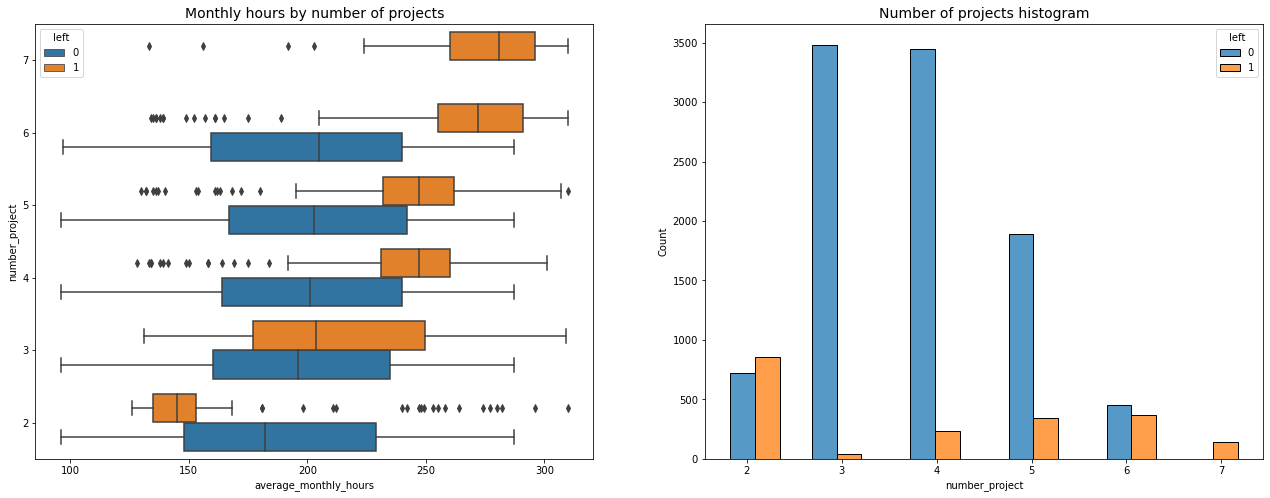

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot of average monthly hours by number of project vs left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram for distribution of 'number_project'
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show();

**Boxplot Interpretation**:

- The median hours of each group increasing with the increasing of number of projects worked. This is natural.
- There are outliers in the data. There are employees who worked about 300 hours monthly, but only work on 2 projects. The make sense conclusion is: They are fired because they failed the project.
- If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.
- There are two groups of employees who left the company: 
    - (1) Those who worked considerably less than their peers with the same number of projects (worked on 2 projects). It's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door
    - (2) Those who worked more than their peers with the same number of projects (worked on 3-6 projects). It's reasonable to infer that they probably quit, they likely contributed a lot to the projects they worked in, so that they gain more skills to start their own business; Or they might have been burned out.

**Histogram Interpretation**:

- There are two groups who left the company with relatively high percentage compared to their peers with the same number of project (aligned with the Boxplot):
    - (1) Those who worked less projects (2): The reason might be they got fired because they don't perform in their first 2 project, or they don't like the job.
    - (2) Those who worked more projects (6-7): The reasons might be the same as in the boxplot interpretation.
- The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

In [45]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

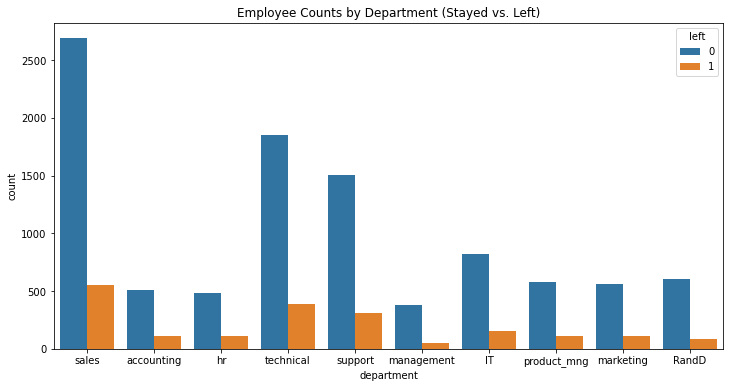

In [51]:
# Countplot of left and stayed employees by department
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='department', hue='left')
plt.title('Employee Counts by Department (Stayed vs. Left)')
plt.show();

**Countplot Interpretation**:

There seems to be no significant difference in proportion of stay/left employees between departments

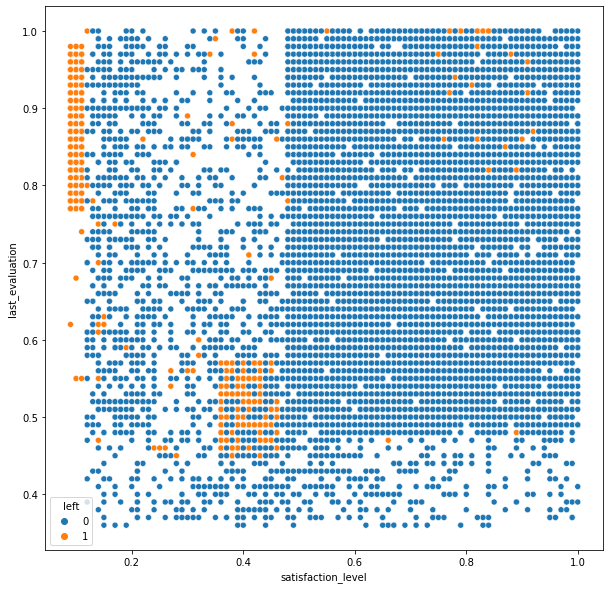

In [56]:
# Scatterplot of satisfaction level vs last evaluation, comparing the left vs stayed
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df1, x='satisfaction_level', y='last_evaluation', hue='left')
plt.show();

**Scatter Plot Interpretation**:

There are two groups of employees who left the company:
- (1) High Perfomers, Low Satisfaction: Those who have a high last evaluation score (around 0.8-0.98), but a very low satisfaction level (around 0.1-0.15). This suggests these are talented employees who are deeply unhappy or "burned out." They are high-value employees who are likely leaving for a better work environment.
- (2) Low Performers, Low Satisfaction: Those who have a moderate last evaluation score (around 0.45-0.57), and moderately low satisfaction level (around 0.35-0.47). This suggests these employees were not performing well and were also unhappy. They may have been fired or "managed out," or they quit before that could happen.

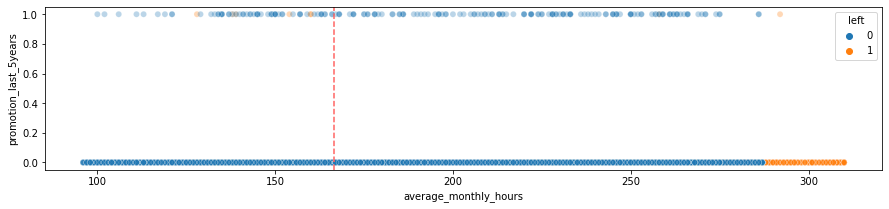

In [63]:
# Scatterplot of promotion last 5 years and average monthly hours, comparing stayed / left employees
plt.figure(figsize=(15, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.3)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.show();

**Scatterplot Interpretation**:

- Very few employees who were promoted in the last 5 years left.
- Most of the employees who were working for longer hours (more than 280 hours monthly) left.
- A lot of hard-working employees (worked for longer hours) were not promoted in the last 5 years.

<Figure size 1152x360 with 0 Axes>

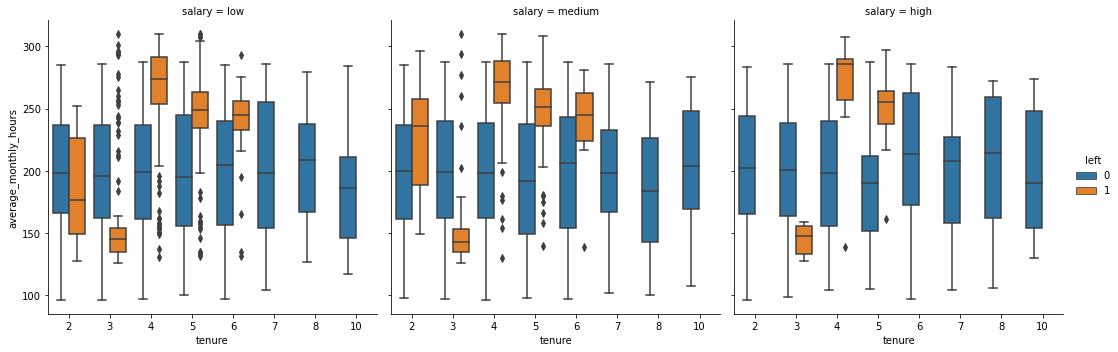

In [66]:
# Create a plot as needed
plt.figure(figsize=(16, 5))
sns.catplot(data=df1, kind='box', x='tenure', y='average_monthly_hours', hue='left', col='salary', col_order=['low', 'medium', 'high'])
plt.show();

**Catplot Interpretation**:

- It seems that our hypothesis on burned-out and disengaged employees are correct:
    - **The Burnout**: For employees with 4 to 6 years of tenure, the ones who leave are the ones who are working more hours than their peers who stay. They are likely burned-out and deciding to quit.
    - **The Disengaged**: For employees with 2 to 3 years of tenure, the ones who leave are the ones who are working few hours than their peers who stay. They are likely a poor fit, not getting enough work, or "coasting" after deciding to quit.

- Employee attrition (leaving) drops to almost zero after the 6-year mark. If an employee makes it past the 6-year "burnout" filter, they become highly loyal and are very likely to stay long-term.

- Salary does not play a significant role in whether employees stayed/left, because the distribution of people stayed/left in each category is similar.

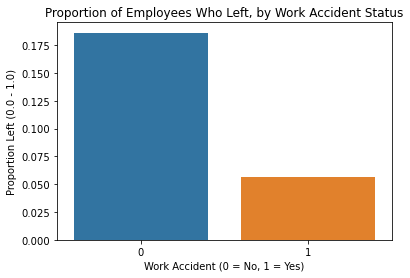

In [75]:
# Barplot to show the proportion of leavers according to work accident
sns.barplot(data=df1, x='work_accident', y='left', ci=False)

plt.title('Proportion of Employees Who Left, by Work Accident Status')
plt.ylabel('Proportion Left (0.0 - 1.0)')
plt.xlabel('Work Accident (0 = No, 1 = Yes)')
plt.show()

**Barplot Interpretation**:

Employees who had a work accident are significantly less likely to leave the company. Because:
- Of the employees who had no accident (0), about 18% left.
- Of the employees who had an accident (1), only about 5.5% left.

These might be the reasons:
- Worker's Compensation & Benefits: This is the most likely reason. An employee who has a work accident may be receiving worker's compensation, paid medical leave, or other disability benefits.
- Increased Company Support: It's possible that Salifort Motors has a good support system. When an employee has an accident, they might receive extra attention from HR and their manager, which can make the employee feel valued and increase their loyalty to the company.
- Reduced Job Mobility: An employee who is recovering from an injury is probably not focused on finding a new job. Their priority is their health, not the stress of interviewing. This temporarily reduces their "flight risk."

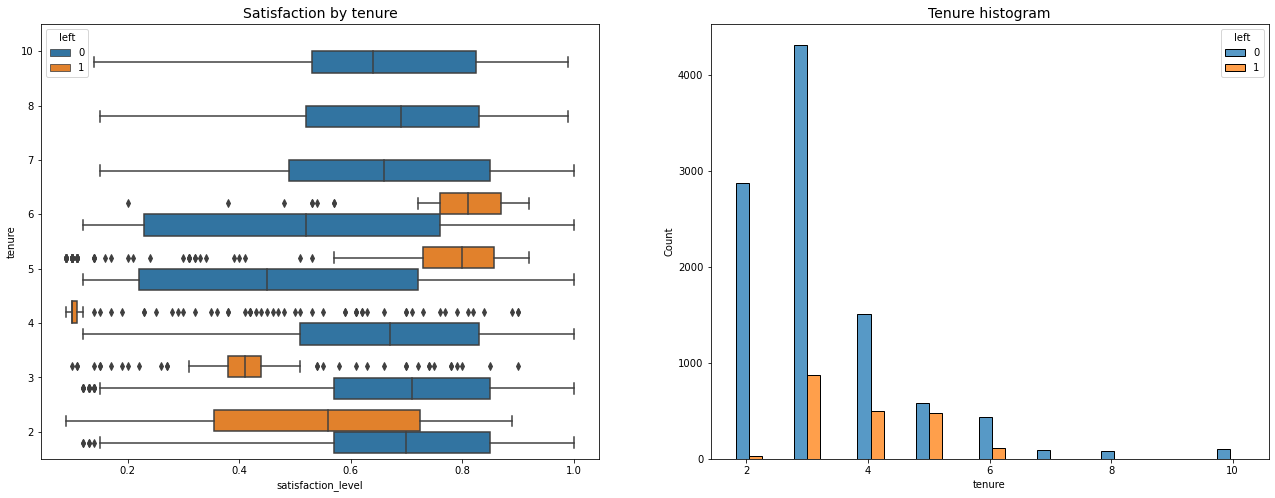

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot for distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Histogram for distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

**Boxplot Interpretation**:
- Employees who left fall into two general categories:
    - (1) Dissatisfied employees with shorter tenures (2-3 years)
    - (2) Very satisfied employees with medium-length tenures (5-6 years).
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

**Histogram Interpretation**:
- There are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

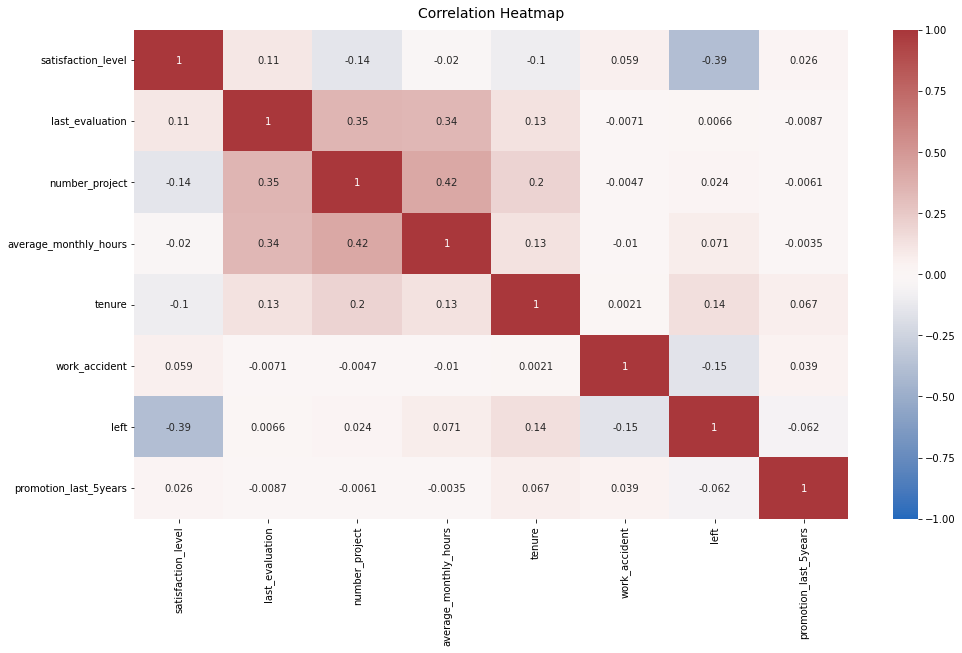

In [76]:
# Correlation Heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

Based from our EDA, we can conclude that:
- We identified the two groups of employees who left the company:
    - **The "Burnouts"**: They are severely overworked, working the most `average_monthly_hours` and juggling 5, 6, or 7 `number_projects`. These are talented employees (`last_evaluation` > 0.8) who are deeply unhappy (`satisfaction_level` < 0.15). This is the largest and most costly group of leavers.
    - **The "Disengaged"**: They are under-worked, with the lowest `average_monthly_hours` and typically only 2 `number_projects`. These employees are unhappy (`satisfaction_level` ~0.4) and have low-to-moderate performance reviews (last_evaluation ~0.5). This group likely represents poor fits, new hires who aren't succeeding, or employees being "managed out."

- The optimal workload for employee retention is 3-4 projects. Employees with 2 projects (disengaged) or 5+ projects (burnout) are at a much higher risk of leaving.

- Both the lowest-hour and highest-hour employees are more likely to leave.

- Tenure:
    - **Year 2-3**: This is the peak time for the "Disengaged" group to leave.
    - **Year 4-6**: This is the peak "burnout" window. Employees are overworked, and attrition is highest.
    - **Years 7+**: Attrition drops to almost zero. Employees who make it past the 6-year mark are extremely loyal.

- The "Burnout" and "Disengaged" patterns were identical across all three salary brackets (low, medium, and high). The root cause is workload and engagement.

- Employees who had a `work_accident` are significantly less likely to leave the company. This is likely because they are receiving benefits (like worker's compensation) that are tied to their employment, or they are receiving extra support from the company, which increases loyalty.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Question 1**:

Yes, it seems that `salary` does not correlate to whether an employee stays / leaves. EDA showed that a higher salary does not protect an employee from leaving due to burnout. The burnout pattern was identical in all three salary brackets.

</br>

**Question 2**:

Based on the EDA, we conclude:
- Significant factors: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `tenure`, `work_accident`, `promotion_last_5years`
- Insignificant factors: `department`, `salary`

But, because we consider to use a tree-based model, we decide to include all of them, and let the model choose which factors are significant in predicting `left`.

</br>

**Question 3**:

Some of the Logistic Regression's assumptions are not met:
- There are some moderate multicollinearity among independent variables.
- There are some extreme outliers in the data.
- There is a non-linear relationship between the independent variables and the dependent variable.

</br>

**Question 4**:

Both Decision Tree and Random Forest fit well with the data:
- Decision Tree (with CV) has `AUC Score` of about 0.975
- Random Forest (with CV) has `AUC Score` of about 0.978

</br>

**Question 5**:

Yes, there's some potential action that could improve the model:
- Do feature engineering, for example: creating a new categorical features `overwork` using `average_monthly_hours` feature.
- Add more parameters for the cv_params to tune.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our task: Predict whether an employee leaves the company (left = 1, stayed = 0), so this is a binary-classification task.

### Identify the types of models most appropriate for this task.

This is a binary-classification task, so we could use classification-task model like Logistic Regression or Tree-based Model.

But, we would not use Logistic Regression on this problem, because:
- There are some moderate multicollinearity among independent variables.
- There are some extreme outliers in the data.
- There is a non-linear relationship between the independent variables and the dependent variable.

So, we would use Tree-based model instead.

**Note**: Actually we could do data transformation on the dataset to suit the assumptions of Logistic Regression, but we consider not to do that in the current project.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [87]:
df_enc = df1.copy()

# Encode salary column using ordinal encoding
df_enc['salary'] = (df_enc['salary'].astype('category')
                                    .cat.set_categories(['low', 'medium', 'high'])
                                    .cat.codes)

# Encode department column using dummy encoding
df_enc = pd.get_dummies(df_enc, columns=['department'], drop_first=False)

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int8   
 9   department_IT           11991 non-null  uint8  
 10  department_RandD        11991 non-null  uint8  
 11  department_accounting   11991 non-null  uint8  
 12  department_hr           11991 non-null  uint8  
 13  department_management   11991 non-null  uint8  
 14  department_marketing    11991 non-null

In [88]:
X = df_enc.drop(columns=['left'])
y = df_enc['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9592, 18), (2399, 18), (9592,), (2399,))

#### Base Model

##### Decision Tree

In [122]:
# Train on base model first
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [123]:
# Evaluate the base model
def get_model_results(model_name:str, model_object, X_test, y_test):
    '''
    Arguments:
        model_name (string): What you want the model to be called in the output table.
        model_object: A *fit* base model (e.g., RandomForestClassifier).
        X_test: The test features.
        y_test: The test target.

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model's performance on the test data.
    '''
    
    # Generate predictions
    y_pred = model_object.predict(X_test)
    y_proba = model_object.predict_proba(X_test)[:, 1] # Probability for the '1' class
    
    # Get scores from classification report
    # We specify output_dict=True to get a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract the scores for the positive class (class '1')
    # Note: '1' is a string key in the report dictionary
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    accuracy = report['accuracy']
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    
    return table

In [124]:
dt_base_results = get_model_results('Decision Tree Base', dt, X_test, y_test)
dt_base_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree Base,0.893462,0.927136,0.909988,0.969571,0.952573


##### Random Forest

In [125]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [126]:
rf_base_results = get_model_results('Random Forest Base', rf, X_test, y_test)
rf_base_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest Base,0.989247,0.924623,0.955844,0.985827,0.974978


In [127]:
base_results = pd.DataFrame(columns=['model', 'precision', 'recall', 'F1', 'accuracy', 'auc'])

base_results = pd.concat([base_results, dt_base_results], ignore_index=True)
base_results = pd.concat([base_results, rf_base_results], ignore_index=True)
base_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree Base,0.893462,0.927136,0.909988,0.969571,0.952573
1,Random Forest Base,0.989247,0.924623,0.955844,0.985827,0.974978


#### CV Model

##### Decision Tree

In [128]:
dtree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(dtree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [129]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.04 s, sys: 23.1 ms, total: 3.06 s
Wall time: 3.06 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [130]:
tree1.best_params_, tree1.best_score_

({'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6},
 0.9723763685033361)

In [131]:
def get_cv_model_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a *fit* GridSearchCV or RandomizedSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
    
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.    
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    # Note: We must use the *exact* column names from cv_results_
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    
    return table

In [132]:
dt_cv_results = get_cv_model_results('Decision Tree CV', tree1, 'auc')
dt_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.966421,0.915878,0.940424,0.980713,0.972376


In [133]:
dt_test_results = get_model_results('Decision Tree Test', tree1, X_test, y_test)
dt_test_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree Test,0.976253,0.929648,0.952381,0.984577,0.974718


##### Random Forest

In [110]:
rforest = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rforest, cv_params, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)

In [111]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 8.89 s, sys: 403 ms, total: 9.29 s
Wall time: 7min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [134]:
rf1.best_params_, rf1.best_score_

({'max_depth': None,
  'max_features': 1.0,
  'max_samples': 0.7,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 500},
 0.9811081894824805)

In [135]:
rf_cv_results = get_cv_model_results('Random Forest CV', rf1, 'auc')
rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.981054,0.906457,0.942244,0.981547,0.981108


In [136]:
cv_results = pd.DataFrame(columns=['model', 'precision', 'recall', 'F1', 'accuracy', 'auc'])
cv_results = pd.concat([cv_results, dt_cv_results], ignore_index=True)
cv_results = pd.concat([cv_results, rf_cv_results], ignore_index=True)
cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.966421,0.915878,0.940424,0.980713,0.972376
1,Random Forest CV,0.981054,0.906457,0.942244,0.981547,0.981108


In [137]:
rf_test_results = get_model_results('Random Forest Test', rf1, X_test, y_test)
rf_test_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest Test,0.989276,0.927136,0.957198,0.986244,0.977704


In [140]:
all_model_results = pd.DataFrame(columns=['model', 'precision', 'recall', 'F1', 'accuracy', 'auc'])
all_model_results = pd.concat([all_model_results, dt_base_results], ignore_index=True)
all_model_results = pd.concat([all_model_results, rf_base_results], ignore_index=True)
all_model_results = pd.concat([all_model_results, dt_test_results], ignore_index=True)
all_model_results = pd.concat([all_model_results, rf_test_results], ignore_index=True)

all_model_results = all_model_results.sort_values(by='auc', ascending=False)
all_model_results

,model,precision,recall,F1,accuracy,auc
3,Random Forest Test,0.989276,0.927136,0.957198,0.986244,0.977704
1,Random Forest Base,0.989247,0.924623,0.955844,0.985827,0.974978
2,Decision Tree Test,0.976253,0.929648,0.952381,0.984577,0.974718
0,Decision Tree Base,0.893462,0.927136,0.909988,0.969571,0.952573


The model Random Forest using CV seems to be the best perfoming model in overall:
- It has the highest AUC score.
- It has the highest accuracy score.
- It has the highest F1 score.

Note that we have no information about whether precision or recall is more important.

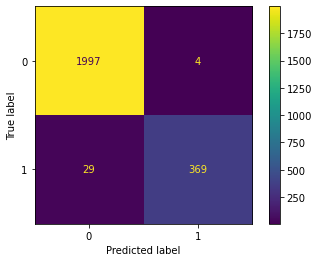

In [142]:
# Plot confusion matrix for Random Forest after CV
y_preds = rf1.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_preds, labels=rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)

disp.plot(values_format='');

The model predicts more false negatives than false positives, which means that some employees may be identified as not quitting, when they're really quitting. But this is still a strong model.

#### Exploratory of Decision Tree Results

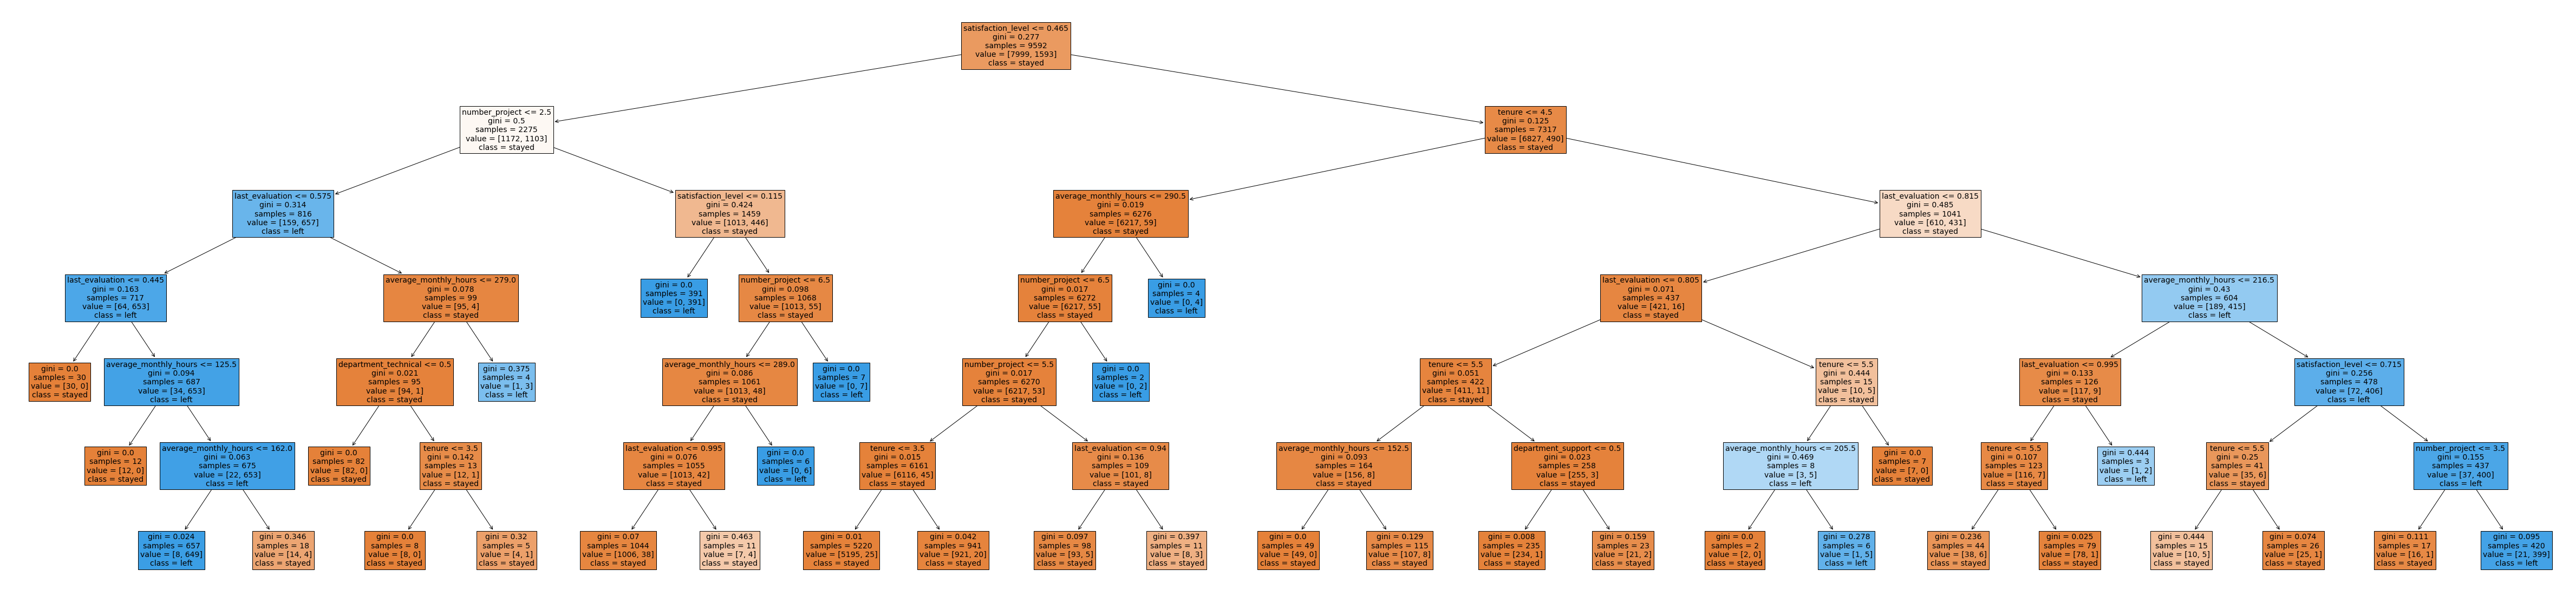

In [144]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [146]:
# Feature importances of Decision Tree
dt_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt_importances = dt_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dt_importances = dt_importances[dt_importances['gini_importance'] != 0]
dt_importances

,gini_importance
satisfaction_level,0.492880
last_evaluation,0.171926
number_project,0.128822
tenure,0.126357
average_monthly_hours,0.079838
department_support,0.000121
department_technical,0.000056


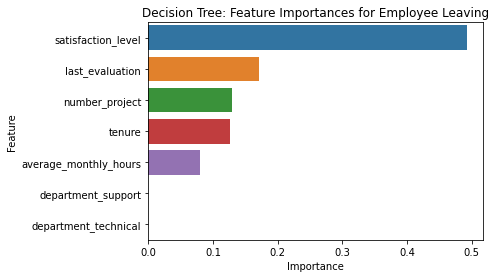

In [149]:
sns.barplot(data=dt_importances, x="gini_importance", y=dt_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `satisfaction_level`, `last_evaluation`,` number_project`, `tenure`, and `average_monthly_hours` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Exploratory of Random Forest Results

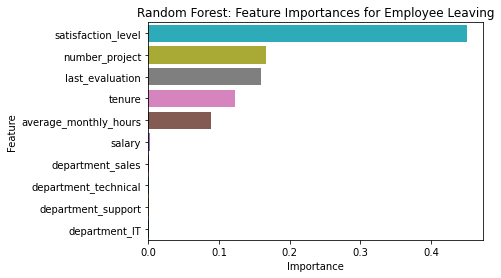

In [156]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature": feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.barplot(data=y_sort_df, y='Feature', x='Importance', ax=ax1)
ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
ax1.invert_yaxis()

plt.show()

The barplot above shows that in this random forest model, `satisfaction_level`, `number_project`, `last_evaluation`, `tenure`, and `average_monthly_hours` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Question 1**:

- A final AUC score of `0.978` and an F1-score of `0.957` are extremely high. This proves that employee attrition at Salifort Motors is not random. It is a predictable outcome based on the key factors we identified.
- The feature importance results from both the Decision Tree and Random Forest models confirm our EDA findings. The top 5 most predictive factors are:
    - satisfaction_level (The single most important predictor)
    - number_project
    - tenure (which you've called time_spend_company)
    - average_monthly_hours
    - last_evaluation
- The RF model had 29 False Negatives vs. 4 False Positives, this means the model's primary weakness is failing to identify employees who are going to leave (it predicts they will stay, but they quit).

</br>

**Question 2**:

My analysis shows that the cost of a False Negative (losing an employee we predicted would stay) is far higher than the cost of a False Positive (giving a bonus to an employee who was staying anyway).

Our model's main weakness is that it produced 29 False Negatives.

Therefore, my primary recommendation is to prioritize and optimize our model for RECALL. We should tune the model (e.g., by adjusting its decision threshold) to be more sensitive, even if it means we get more False Positives. It is a better business outcome to 'waste' a few retention bonuses than to be blindsided by 29 employees quitting.

</br>

**Question 3**:

- The model's "flight risk" score must only be used to start supportive, positive conversations. Managers should use it to identify who needs help, a workload adjustment, or a career pathing discussion. It must never be used to deny promotions, raises, or key projects, as this is unethical and will create a self-fulfilling prophecy.
- Our model is good at predicting what is happening, but we are still guessing why. The company should start systematically collecting data from exit interviews. This would give us "ground truth" features like reason_for_leaving (e.g., 'Compensation', 'Management', 'No Growth') and make our next model even more powerful.

</br>

**Question 4**:

Yes, here are some potential action that might improve our model:
- Do feature engineering, for example: creating a new categorical features overwork using average_monthly_hours feature.
- Add more parameters for the cv_params to tune.
- Try other models, such as gradient-boosting models (like XGBoost or LightGBM), which often outperform Random Forests and could reduce our False Negatives even further, but these model are less interpretable.

</br>

**Question 5**:

- Our model identifies who is at risk, but our EDA suggests why (burnout, disengaged). Can we build a binary-class model to predict which risk profile an employee fits into ('Burnout', 'Disengaged') to provide managers with a more specific action plan?
- Our EDA strongly suggests the high `average_monthly_hours` are not errors, but a sign of a systemic workload problem. Can we quantify the business impact of this? For example, how does a high-workload quarter affect an employee's `last_evaluation score` or `satisfaction_level` in the next quarter?

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Decision Tree**

The decision tree model achieved precision of 97.6%, recall of 93%, f1-score of 95.2%, and accuracy of 98.5%, on the test set.

**Random Forest**

The random forest model achieved precision of 98.9%, recall of 92.7%, f1-score of 95.7%, and accuracy of 98.6%, on the test set.

### Conclusion, Recommendations, Next Steps

This project successfully demonstrated that employee attrition at Salifort Motors is not a random event, but a highly predictable outcome driven by a specific set of factors.

By analyzing the HR dataset, we developed a Random Forest model that can predict whether an employee will leave with extremely high confidence, achieving an Area Under the Curve (AUC) of 0.978 and an F1-score of 0.957.

The model's feature importance confirmed our key findings from the Exploratory Data Analysis (EDA). The most significant predictors of attrition are:
1. satisfaction_level
2. number_project
3. tenure
4. average_monthly_hours
5. last_evaluation

Our analysis revealed that employees leave in distinct patterns, primarily falling into "Burnout" and "Disengaged" profiles. The model's primary weakness is its 29 False Negatives, where it failed to predict an employee's departure. As we will see, this is the most critical error for the business, and it directly informs our recommendations.

**Recomendations**

To retain employees, the following recommendations could be presented to the stakeholders:
- Don't wait for annual reviews. Implement lightweight, quarterly "pulse surveys" to get a real-time, predictive measure of company-wide satisfaction.
- Create workload alerts. Managers should be notified when an employee is assigned 5+ projects or logs over $\approx$280 hours, as these are top burnout indicators. The "sweet spot" for retention is 3-4 projects.
- Proactively engage with employees in the 4-6 year "burnout window." This is the critical time to discuss career growth, promotions, or new assignments to keep them engaged.

**Next steps**

- Our model is good at predicting what is happening, but we are still making educated guesses about why. The company must begin systematically collecting data from exit interviews. Adding a reason_for_leaving feature (e.g., 'Compensation', 'Management', 'No Growth') would be the single most valuable improvement we could make.

- Create new features, such as an "overwork" category based on average_monthly_hours, to see if it simplifies the model's rules.

- Test gradient-boosting models (like XGBoost or LightGBM). They often outperform Random Forests and could be the key to reducing our False Negative count.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.